## 本程序统计label（配位数和平均键长）的情况。

### 程序处理对象为“_untar”文件夹，输出结果在“_untar_stastistics”下，包含txt文档和图片。

### 假设需要统计的文件的目录结构为“AuPd-4000_au150-0_WT_untar”（一级目录）——“500”（二级目录）——“1/2/3/4等解压缩的文件夹”（三级目录），将本程序安放在与一级目录平行的另一个一级目录（或一级目录本身）的任意一个二级文件目录内，即可运行。

### 它会读取用户输入的一级目录（如“AuPd-4000_au150-0_WT_untar”），运行后会在一级目录下产生一个“AuPd-4000_au150-0_WT_untar_statistics”的文件夹，包含label的统计情况。该文件夹下会有“cluster”文件夹，内有统计各cluster各个位点统计的配位数柱状图和第一配位键长的统计图。

### To do, CR分布绘图，如下，可以优化。这些数据在list_modify和list_modify_without0中处理，绘图在plot_cn，plot_cr中处理。

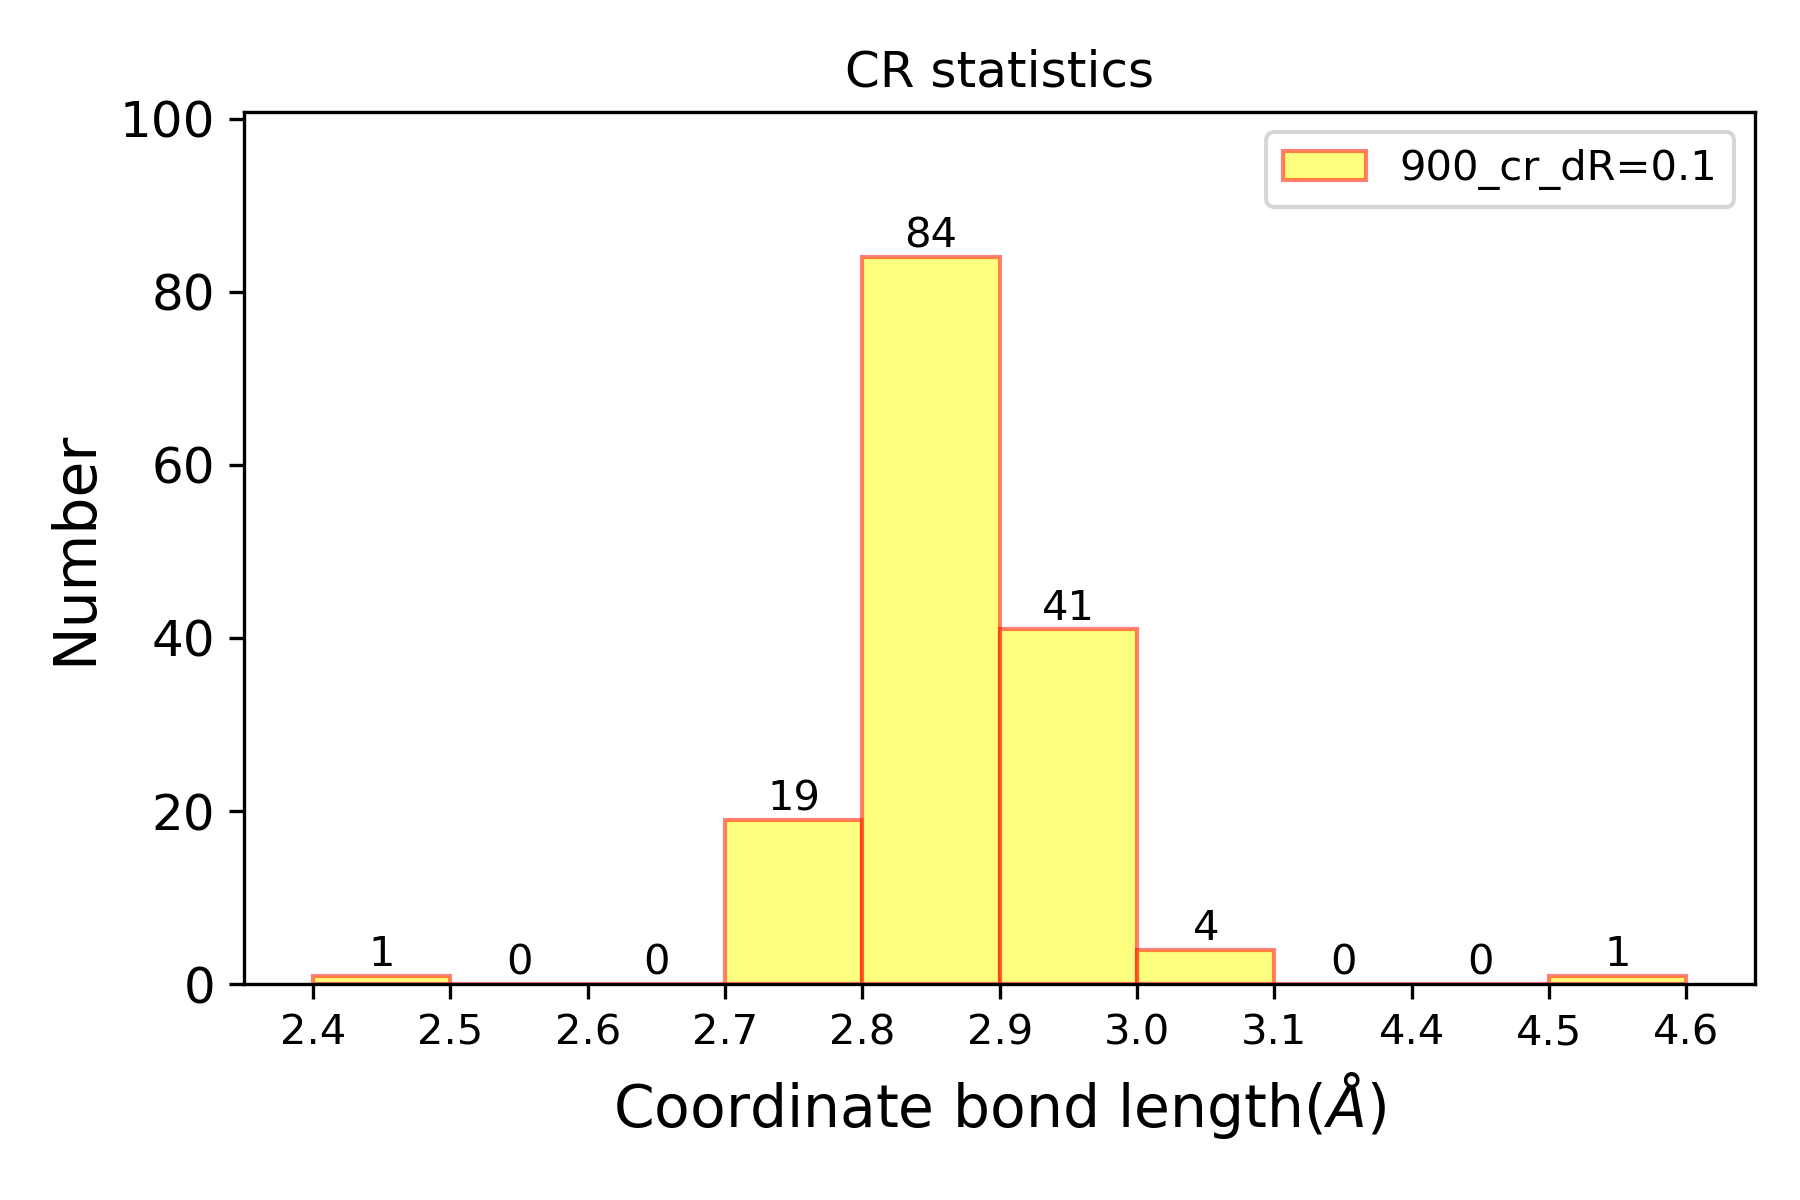

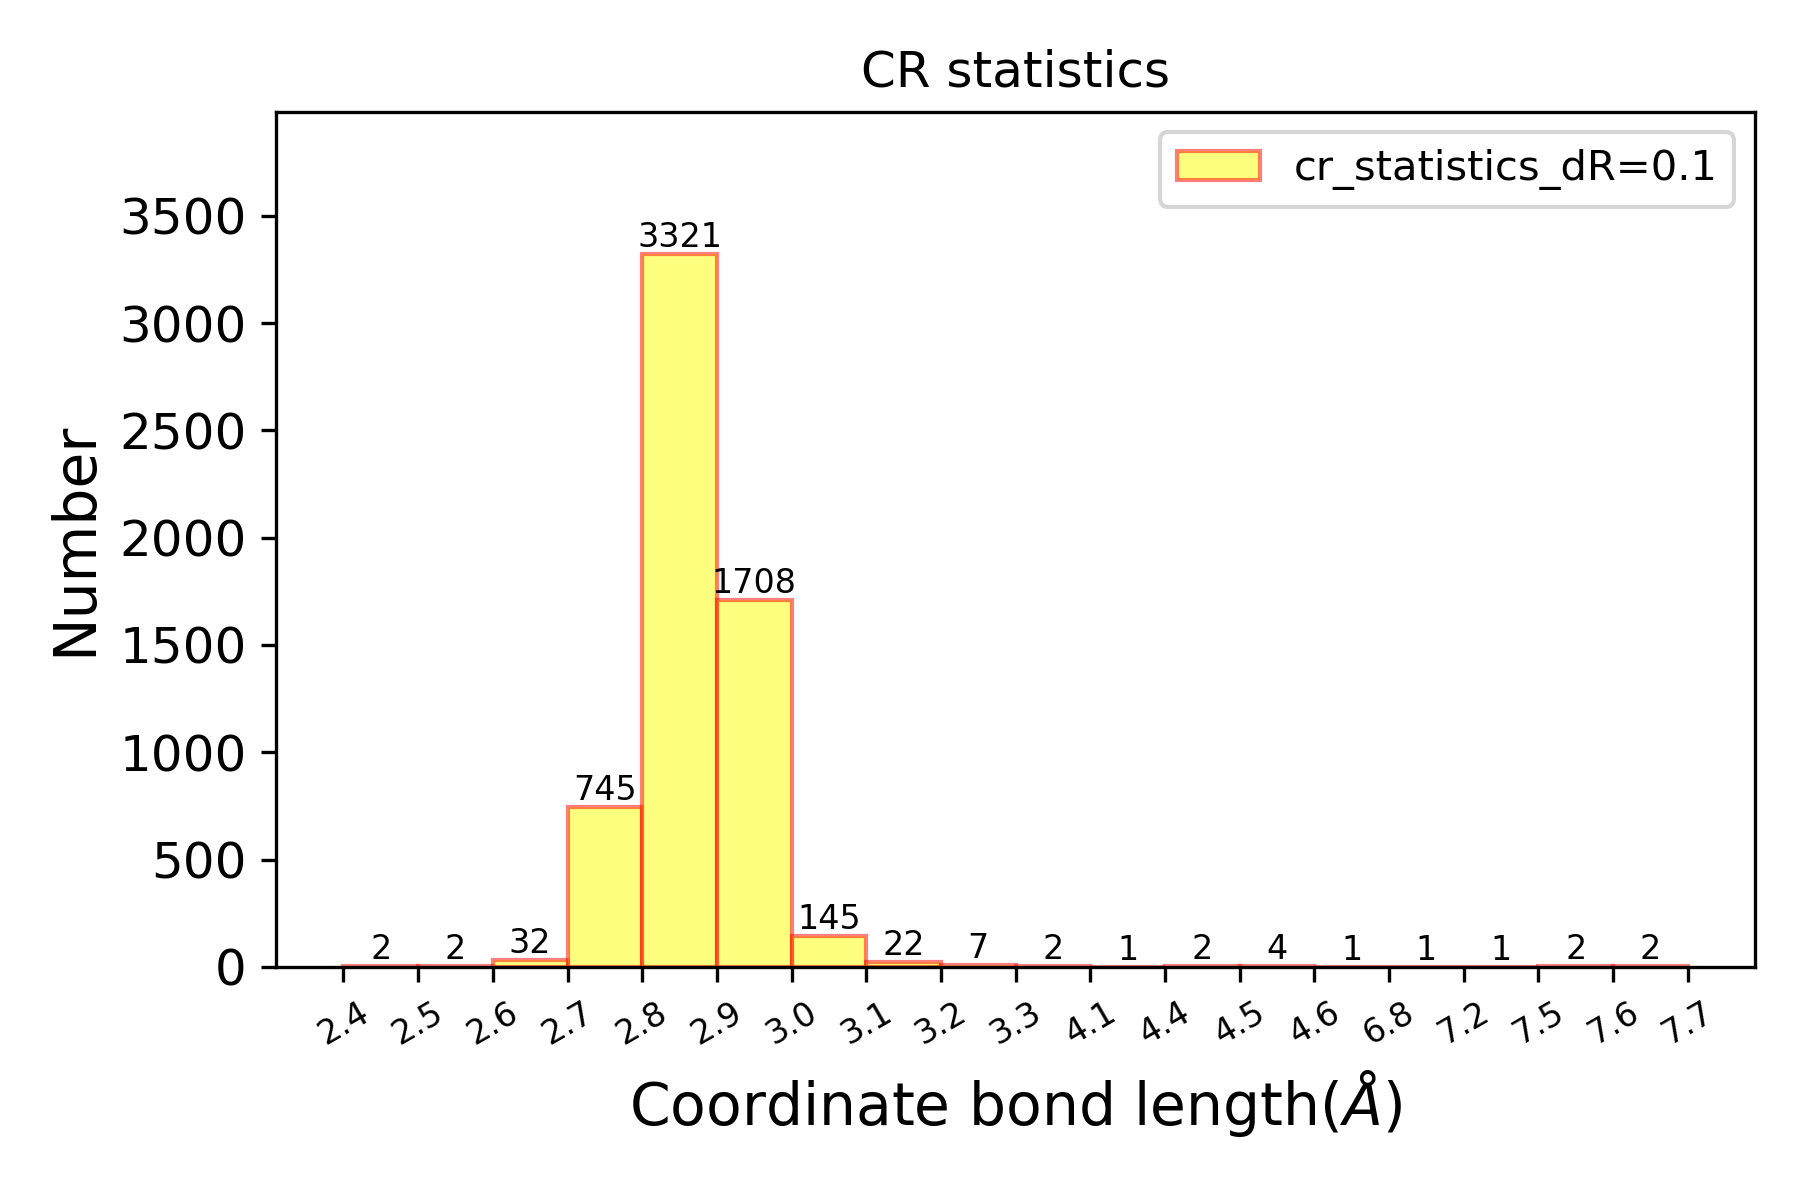

last update： 2022.1.12

contacts: zhaohf@ihep.ac.cn

# 配置环境

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

输出导入模板的版本。

In [2]:
print('python version:',sys.version)
print('numpy version:',np.__version__)
print('panda version:',pd.__version__)
print('matplotlib version:',mpl.__version__)

python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.21.5
panda version: 1.4.2
matplotlib version: 3.5.1


# 设置运行参数

## 设置源文件夹，即经过计算集群计算的文件夹

In [3]:
dir_src = 'AuPd-4000_au150-0_DW_R0_cncr_WT_untar'

## 定义统计标记后缀

In [4]:
stat = '_statistics'

## 设置CR统计间隔和小数点后有效位数（为了画图）（如果是晶体，可以delta_R，但程序不会使用）
注意delta_R和digit最好对应

In [5]:
delta_R = 0.1
digit = 1

## 设置输出文件名字前缀，delta_R，为区别不同间隔统计时图片的覆盖

In [6]:
prf_dR = f"_dR={delta_R}"

## 设置CN的统计输出文件名和图片输出名

In [7]:
file_cn_statistics_txt = 'cn' + stat + '.txt'
file_cn_statistics_png = 'cn' + stat

## 设置CR的统计输出文件名和图片输出名

In [8]:
file_cr_statistics_txt = 'cr' + stat + prf_dR + '.txt'
file_cr_statistics_png = 'cr' + stat + prf_dR
file_cr_statistics_txt

'cr_statistics_dR=0.1.txt'

# 部分函数模块

## 绘图模块

### 设置绘图格式和保存图片

注意这里的save_fig与神经网络中的有所不同，特别时路径和文件名位置换了。

In [9]:
# To plot pretty figures
# %matplotlib具体作用是调用matplotlib.pyplot的绘图函数plot()进行绘图时，
# 或生成一个figure画布时，可以直接在你的python console里面生成图像。
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)   # matplotlib.rc 什么意思没找到
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(IMAGES_PATH, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
#    plt.show()

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 绘制配位数柱状图

#### CN 各cluster

In [10]:
# 绘制各个cluster的CN统计图
def plot_cn(x, y, path, file):
    """
    绘制CN统计图。
    x：平均配位数列表
    y: x对应的样本数
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure(1)
    ax1 = fig.add_subplot(1,1,1)
#
    x_index = np.array(x)
    y_index = np.array(y)
    y_max = max(y_index)
#
    len_x = len(x)
    ind = np.linspace(1,len_x,len_x)
#
#    bar_width = 0.8 #定义一个数字代表每个独立柱的宽度
#    rects1 = ax1.bar(ind, y_index, width=bar_width,alpha=0.7, color='blue',label=file)
    rects1 = ax1.bar(ind, y_index,width=0.8,alpha=0.4,color='blue',edgecolor='red',label=file,lw=1)
#
    for a,b in zip(ind,y_index):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
#
#    plt.ylim(0,cn_max*1.2)
#    plt.legend(loc='upper right') #显示图例
    plt.legend()
    plt.tight_layout() #自动控制图像外部边缘，此方法不能够很好的控制图像间的间隔
#
#    plt.xticks(np.arange(min(cn_list),max(cn_list)+1,1), rotation=0)#rotation控制倾斜角度   #x轴刻度线
    ax1.set_xticks(ind)
    ax1.set_xticklabels(x,rotation=0,fontsize=10)
    ax1.set_xlabel('Coordinate number')
    ax1.set_ylabel('Number')
    ax1.set_title('CN statistics')
    ax1.set_ylim(0,y_max*1.2)
#
    save_fig(path,file)
    plt.close(fig)

#### CN all，绘制所有样本的CN统计图

In [11]:
# 绘制所有样本的CN统计图
def plot_cn_all(x, y, path, file):
    """
    绘制CN统计图。
    x：平均配位数列表
    y: x对应的样本数
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
#
    x_index = np.array(x)
    y_index = np.array(y)
    y_max = max(y_index)
#
    len_x = len(x)
    ind = np.linspace(1,len_x,len_x)
#
#    bar_width = 0.8 #定义一个数字代表每个独立柱的宽度
#    rects1 = ax1.bar(ind, y_index, width=bar_width,alpha=0.7, color='blue',label=file)
    rects1 = ax1.bar(ind, y_index,width=0.8,alpha=0.4,color='blue',edgecolor='red',label=file,lw=1)
#
    for a,b in zip(ind,y_index):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)
#
#    plt.ylim(0,cn_max*1.2)
#    plt.legend(loc='upper right') #显示图例
    plt.legend()
    plt.tight_layout() #自动控制图像外部边缘，此方法不能够很好的控制图像间的间隔
#
#    plt.xticks(np.arange(min(cn_list),max(cn_list)+1,1), rotation=0)#rotation控制倾斜角度   #x轴刻度线
    ax1.set_xticks(ind)
    ax1.set_xticklabels(x,rotation=45,fontsize=8)
    ax1.set_xlabel('Coordinate number')
    ax1.set_ylabel('Number')
    ax1.set_title('CN statistics')
    ax1.set_ylim(0,y_max*1.2)
#
    save_fig(path,file)
    plt.close(fig)

#### CR 各cluster

In [12]:
# 绘制各个cluster的CR统计图
def plot_cr(x, y, path, file, digit=1):
    """
    绘制CR统计图。
    x：平均配位键长列表
    y: x对应的样本数
    digit：自然数，用于给出绘制图中x轴数字的有效位数，如果步长为0.1，则为1，若步长为0.05， 则为2
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
#
    x_index = np.array(x)
    y_index = np.array(y)
    y_max = max(y_index)
#
    len_x = len(x)
    if len_x == 1:
        delta = 10**(-digit)
    else:
        delta = x[1]-x[0]
#
    ind = np.linspace(1,len_x,len_x)
#
    bar_width = 1 #定义一个数字代表每个独立柱的宽度
#
    rects1 = ax1.bar(ind, y_index, width=bar_width,align='edge',alpha=0.5, color='yellow',edgecolor='red',label=file)
    for a,b in zip(ind,y_index):
        plt.text(a+0.5, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
#    plt.xticks(x_index + bar_width/2, x_data) #x轴刻度线
#    plt.legend('upper right') #显示图例
    plt.legend() #显示图例
    plt.tight_layout() #自动控制图像外部边缘，此方法不能够很好的控制图像间的间隔
#
    ax1.set_xticks(np.append(ind,len_x+1))
    xx = list(np.append(x_index,round(x[-1]+delta,digit)))
    ax1.set_xticklabels(xx,rotation=0,fontsize=10)
    ax1.set_xlabel('Coordinate bond length($\AA$)')
    ax1.set_ylabel('Number')
    ax1.set_title('CR statistics')
    ax1.set_ylim(0,y_max*1.2)
#
    save_fig(path,file)
    plt.close(fig)

#### CR all

In [13]:
# 绘制所有样本的CR统计图
def plot_cr_all(x, y, path, file, digit=1):
    """
    绘制CR统计图。
    x：平均配位键长列表
    y: x对应的样本数
    digit：自然数，用于给出绘制图中x轴数字的有效位数，如果步长为0.1，则为1，若步长为0.05， 则为2
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
#
    x_index = np.array(x)
    y_index = np.array(y)
    y_max = max(y_index)
#
#
    len_x = len(x)
    if len_x == 1:
        delta = 10**(-digit)
    else:
        delta = x[1]-x[0]
#
    ind = np.linspace(1,len_x,len_x)
#
    bar_width = 1 #定义一个数字代表每个独立柱的宽度
#
    rects1 = ax1.bar(ind, y_index, width=bar_width,align='edge',alpha=0.5, color='yellow',edgecolor='red',label=file)
    for a,b in zip(ind,y_index):
        plt.text(a+0.5, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)
#    plt.xticks(x_index + bar_width/2, x_data) #x轴刻度线
#    plt.legend('upper right') #显示图例
    plt.legend() #显示图例
    plt.tight_layout() #自动控制图像外部边缘，此方法不能够很好的控制图像间的间隔
#
    ax1.set_xticks(np.append(ind,len_x+1))
    xx = list(np.append(x_index,round(x[-1]+delta,digit)))
    ax1.set_xticklabels(xx,rotation=30,fontsize=8)
    ax1.set_xlabel('Coordinate bond length($\AA$)')
    ax1.set_ylabel('Number')
    ax1.set_title('CR statistics')
    ax1.set_ylim(0,y_max*1.2)
#
    save_fig(path,file)
    plt.close(fig)

#### cr连续分布绘图

In [14]:
def plot_cr_seq(y, path, file, note='Avg. 1st bond length'):
    """
    绘制CR统计图。
    y: 序列R样本数
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
#
    x = list(range(len(y)))
    ax1.plot(x,y, label=file)
#
    ax1.set_title(note)
    ax1.set_xlabel('site')
    ax1.set_ylabel(note+'($\AA$)')
    ax1.legend()
    save_fig(path,file)
    plt.close(fig)

#### cr error连续分布绘图

In [15]:
def plot_cr_error_seq(y, path, file, note='Avg. 1st bond length error'):
    """
    绘制CR error统计图。
    y: 序列R样本数
    path：图的保存路径
    file：图的名称（不包含后缀）    
    """
#
    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
#
    x = list(range(len(y)))
    ax1.plot(x,y, label=file)
#
    ax1.set_title(note)
    ax1.set_xlabel('site')
    ax1.set_ylabel(note)
    ax1.legend()
    save_fig(path,file)
    plt.close(fig)

## 读取coor.dat文件中的数组

In [16]:
def read_coor(path_coor, shell=1):
    """
    读取coor.dat中前shell个壳层的数据
    """
    exist = os.path.exists(path_coor)
    if exist:
        coor = pd.read_csv(path_coor,delim_whitespace=True,header=None, skiprows=[0,1])
        coor_data = coor.values
        cn = coor_data[0:shell,1]
        r = coor_data[0:shell,2]
        r_d = coor_data[0:shell,3]
#
        return cn,r,r_d
#
    else:
        return None  

## 将一个整数序列（含有多个连续零）改造成只包含少量零的序列，供作图使用

In [17]:
def list_modify(start, end, list0):
    """
    删除list0(start, end)中0元素连续超过三个的部分，只保留有非零周围的0，返回修正过的列表和列表各元素所对应的原序号
    这里假设list0[start]和list0[end]都不为0。
    """
    list_index = []
    list_modify = []
    if start == end:
        list_index = [start]
        list_modify = [list0[start]]
        return list_index, list_modify
    if start > end:
        print(f"\n{'#'*10:10}Warning!! Error list!")
        print(f"{' ':10}Start({start}) > End({end}) !")
#        sys.exit(0)
        return [], []
#
    for i in range(start,end):    #注意，这里不统计list0[end]因为它不为零
        j = list0[i] + list0[i+1]
        if j != 0:
            list_index.append(i)
            list_modify.append(list0[i])
        else:
            k = list0[i] + list0[i-1]
            if k != 0:
                list_index.append(i)
                list_modify.append(list0[i])
    list_index.append(end)
    list_modify.append(list0[end])
    return list_index, list_modify

In [18]:
def list_modify_without0(start, end, list0):
    """
    删除list0(start, end)中所有0元素，返回修正过的列表和列表各元素所对应的原序号
    这里假设list0[start]和list0[end]都不为0。
    """
    list_index = []
    list_modify = []
    if start == end:
        list_index = [start]
        list_modify = [list0[start]]
        return list_index, list_modify
    if start > end:
        print(f"\n{'#'*10:10}Warning!! Error list!")
        print(f"{' ':10}Start({start}) > End({end}) !")
#        sys.exit(0)
        return [], []
#
    for i in range(start,end):    #注意，这里估计不统计list0[end]因为它不为零
        j = list0[i]
        if j != 0:
            list_index.append(i)
            list_modify.append(j)
    list_index.append(end)
    list_modify.append(list0[end])
    return list_index, list_modify

# 程序正文

## 当前目录

In [19]:
path = os.path.abspath('./')
path

'D:\\haifeng\\work_20211031\\XAS-ML\\code\\datasets setup\\jupyterbook'

In [20]:
# 上一级目录
path_par = os.path.abspath(os.path.pardir)
path_par

'D:\\haifeng\\work_20211031\\XAS-ML\\code\\datasets setup'

## 源文件夹目录

In [21]:
# 源文件夹目录
path_src = os.path.join(path_par, dir_src)
# 检查源文件夹是否存在，存在则列出其内部文件夹，不存在则打印错误
exist = os.path.exists(path_src)
if exist:
    list_seed = os.listdir(path_src)
else:
    print()
    print('** Error!! WT untared directory', dir_src, 'is not found!' )
    print()
#    sys.exit()
list_seed

['100',
 '1000',
 '1100',
 '1200',
 '1300',
 '1400',
 '1500',
 '1600',
 '1700',
 '1800',
 '1900',
 '200',
 '2000',
 '2100',
 '2200',
 '2300',
 '2400',
 '2500',
 '2600',
 '2700',
 '2800',
 '2900',
 '300',
 '3000',
 '3100',
 '3200',
 '3300',
 '3400',
 '3500',
 '3600',
 '3700',
 '3800',
 '3900',
 '400',
 '4000',
 '500',
 '600',
 '700',
 '800',
 '900']

## 目标文件夹

In [22]:
dir_work = dir_src + stat
path_work = os.path.join(path_par, dir_work)
os.makedirs(path_work, exist_ok=True)
path_work

'D:\\haifeng\\work_20211031\\XAS-ML\\code\\datasets setup\\AuPd-4000_au150-0_DW_R0_cncr_WT_untar_statistics'

## 统计coor.dat中第一壳层的数据。

### 分开每个cluster统计

a = [[1,2,3]]
b = [[4,5,6]]
a+b = [[1, 2, 3], [4, 5, 6]]

a = [], b = [1,2] ,a.append(b) = [[1, 2]]

a = [], b = [1,2], a+b = [1, 2]

In [23]:
#  这里假设最多配位数为m，其值可以提高，因为后面会删除没有统计到的配位数情况，但再高没有物理意义。
# mm为配位键长/delta_R之后取整的最大值,我们这里假设最大CR为10埃
# trivial 是一个很小的值，用于在对读取的cn、cr进行相加，让其避免出现2.8/0.05=55.99999999999999，然后取int时只得到55的错误。
# 为避免trivial与delta_R可比较，这里将其设为
N_atom_max = 150
CR_Max = 10
trivial = min(0.00001, delta_R/100)
#
m = N_atom_max
mm = int(CR_Max / delta_R)
#  N_bad 表示不好的位点数量（也就是配位数超过m的位点数）
N_bad = 0
#
#
N_seed = len(list_seed)
#
#
#  CN是一个数组，共N_seed行（cluster个数），m+1列，CN(i,j)为第i个cluster，配位数为j的样本数
#  CR是一个数组，共N_seed行（cluster个数），mm+1列，CR(i,j)为第i个cluster，配位键长为j*delta_R（在[j*delta_R,(j+1)*delta_R）的样本数
#  R_all和R_all_d都是数组list，共N_seed*mm个元素，顺溜着读取键长和误差。
#  CN_min, CN_max, CR_min, CR_max都是数组，CN_min[i]表示第（i+1）个cluster的最小配位数标号，其他数组类似
#  cluster为数组，cluster[i]对应于第（i+1）个cluster的名称
CN = np.zeros((N_seed,m+1),dtype=int)
CR = np.zeros((N_seed,mm+1),dtype=int)
R_all = []
R_d_all = []
CN_min = []
CN_max = []
CR_min = []
CR_max = []
#
CN_all_min = m
CN_all_max = 0
CR_all_min = mm+1
CR_all_max = 0
#
#
# 进入各个cluster，即100、200等
for iseed, dir_seed in enumerate(list_seed):
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  注意CN、R、R_d放在这里是统计某个cluster下所有位点的情况，如果想统计所有cluster的情况，则将下面的CN、R、R_d等放在上一个循坏之外。
    R = []
    R_d = []
#
    for ixyz, dir_xyz in enumerate(list_xyz):
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
# 查找xyz路径（文件夹）下是否存在“coor.dat”文件
        file = 'coor.dat'
        path_coor_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_coor_src)
        if exist:
#  提取绘图信息
            cn,r,r_d = read_coor(path_coor_src,1)
#
            if cn[0] > m:
                N_bad = N_bad + 1
                print()
                print('** file', dir_seed, '/', dir_xyz, ' should be checked! **')
                print('** It''s CN is', cn[0])
                print('** It''s CR is', r[0])
                print('** It''s CR delta is', r_d[0])
                continue
#
            CN[iseed][int(cn[0]+trivial)] += 1
            CR[iseed][int((r[0]+trivial)/delta_R)] += 1
#
            R.append(r[0])
            R_d.append(r_d[0])
#
#  每个cluster中cn、cr的最小、最大值的标号
    for i in range(m+1):
        if CN[iseed][i] != 0:
            break
    cn_min = i
#
    for i in range(m,0,-1):
        if CN[iseed][i] != 0:
            break
    cn_max = i
#
    for i in range(mm+1):
        if CR[iseed][i] != 0:
            break
    cr_min = i
#
    for i in range(mm,0,-1):
        if CR[iseed][i] != 0:
            break
    cr_max = i
#
#
    CN_max.append(cn_max)
    CN_min.append(cn_min)
    CR_max.append(cr_max)
    CR_min.append(cr_min)
#
    CN_all_min = min(CN_all_min, cn_min)
    CN_all_max = max(CN_all_max, cn_max)
    CR_all_min = min(CR_all_min, cr_min)
    CR_all_max = max(CR_all_max, cr_max)
#
    R_all.append(R)
    R_d_all.append(R_d)
#
#
print()
print('**', N_bad, 'sites\'cn larger than',m, 'should be checked. **')
#
#
CN_sum = np.sum(CN, axis=0)
CR_sum = np.sum(CR, axis=0)
#
CN_all_sum = np.sum(CN_sum)
CR_all_sum = np.sum(CR_sum)


** 0 sites'cn larger than 150 should be checked. **


### 数列调整
将统计的数列中的0去掉，一种是保留数字周围的0，一种是删除所有的0

In [24]:
# list_CN 、count_CN 为数列，其第i个元素为第（i+1）个cluster的调整过的配位数列表
list_CN = []
count_CN = []
list_CR = []
count_CR = []
for i, dir_seed in enumerate(list_seed):
    cn_min = CN_min[i]
    cn_max = CN_max[i]
    cr_min = CR_min[i]
    cr_max = CR_max[i]
#
    b,c = list_modify(cn_min, cn_max, CN[i])
    list_CN.append(b)
    count_CN.append(c)
#
    b, c = list_modify(cr_min, cr_max, CR[i])
    list_CR.append(b)
    count_CR.append(c)
#
b, c = list_modify_without0(CN_all_min, CN_all_max, CN_sum)
list_CN.append(b)
count_CN.append(c)
#
b, c = list_modify_without0(CR_all_min, CR_all_max, CR_sum)
list_CR.append(b)
count_CR.append(c)

### 绘图

In [25]:
#  设置plot文件夹
#
dir_cluster = 'cluster'
path_plot_work = os.path.join(path_work, dir_cluster)
os.makedirs(path_plot_work, exist_ok=True)

#### CN统计绘图

In [26]:
for i, dir_seed in enumerate(list_seed):
    file_cn = dir_seed + '_cn'
    plot_cn(list_CN[i], count_CN[i], path_plot_work, file_cn)
plot_cn_all(list_CN[-1], count_CN[-1], path_work, file_cn_statistics_png)

Saving figure 100_cn
Saving figure 1000_cn
Saving figure 1100_cn
Saving figure 1200_cn
Saving figure 1300_cn
Saving figure 1400_cn
Saving figure 1500_cn
Saving figure 1600_cn
Saving figure 1700_cn
Saving figure 1800_cn
Saving figure 1900_cn
Saving figure 200_cn
Saving figure 2000_cn
Saving figure 2100_cn
Saving figure 2200_cn
Saving figure 2300_cn
Saving figure 2400_cn
Saving figure 2500_cn
Saving figure 2600_cn
Saving figure 2700_cn
Saving figure 2800_cn
Saving figure 2900_cn
Saving figure 300_cn
Saving figure 3000_cn
Saving figure 3100_cn
Saving figure 3200_cn
Saving figure 3300_cn
Saving figure 3400_cn
Saving figure 3500_cn
Saving figure 3600_cn
Saving figure 3700_cn
Saving figure 3800_cn
Saving figure 3900_cn
Saving figure 400_cn
Saving figure 4000_cn
Saving figure 500_cn
Saving figure 600_cn
Saving figure 700_cn
Saving figure 800_cn
Saving figure 900_cn
Saving figure cn_statistics


#### CR统计绘图

In [27]:
for i, dir_seed in enumerate(list_seed):
    file_cr = dir_seed + '_cr' + prf_dR
    plot_cr(list(np.around(np.array(list_CR[i])*delta_R,digit)), count_CR[i], path_plot_work, file_cr, digit)
plot_cr_all(list(np.around(np.array(list_CR[-1])*delta_R,digit)), count_CR[-1], path_work, file_cr_statistics_png, digit)

Saving figure 100_cr_dR=0.1
Saving figure 1000_cr_dR=0.1
Saving figure 1100_cr_dR=0.1
Saving figure 1200_cr_dR=0.1
Saving figure 1300_cr_dR=0.1
Saving figure 1400_cr_dR=0.1
Saving figure 1500_cr_dR=0.1
Saving figure 1600_cr_dR=0.1
Saving figure 1700_cr_dR=0.1
Saving figure 1800_cr_dR=0.1
Saving figure 1900_cr_dR=0.1
Saving figure 200_cr_dR=0.1
Saving figure 2000_cr_dR=0.1
Saving figure 2100_cr_dR=0.1
Saving figure 2200_cr_dR=0.1
Saving figure 2300_cr_dR=0.1
Saving figure 2400_cr_dR=0.1
Saving figure 2500_cr_dR=0.1
Saving figure 2600_cr_dR=0.1
Saving figure 2700_cr_dR=0.1
Saving figure 2800_cr_dR=0.1
Saving figure 2900_cr_dR=0.1
Saving figure 300_cr_dR=0.1
Saving figure 3000_cr_dR=0.1
Saving figure 3100_cr_dR=0.1
Saving figure 3200_cr_dR=0.1
Saving figure 3300_cr_dR=0.1
Saving figure 3400_cr_dR=0.1
Saving figure 3500_cr_dR=0.1
Saving figure 3600_cr_dR=0.1
Saving figure 3700_cr_dR=0.1
Saving figure 3800_cr_dR=0.1
Saving figure 3900_cr_dR=0.1
Saving figure 400_cr_dR=0.1
Saving figure 4000

#### CR连续分布绘图

In [28]:
for i, dir_seed in enumerate(list_seed):
    file_cr_seq = dir_seed + '_cr_seq'
    plot_cr_seq(R_all[i], path_plot_work, file_cr_seq, note='Avg. 1st bond length')

Saving figure 100_cr_seq
Saving figure 1000_cr_seq
Saving figure 1100_cr_seq
Saving figure 1200_cr_seq
Saving figure 1300_cr_seq
Saving figure 1400_cr_seq
Saving figure 1500_cr_seq
Saving figure 1600_cr_seq
Saving figure 1700_cr_seq
Saving figure 1800_cr_seq
Saving figure 1900_cr_seq
Saving figure 200_cr_seq
Saving figure 2000_cr_seq
Saving figure 2100_cr_seq
Saving figure 2200_cr_seq
Saving figure 2300_cr_seq
Saving figure 2400_cr_seq
Saving figure 2500_cr_seq
Saving figure 2600_cr_seq
Saving figure 2700_cr_seq
Saving figure 2800_cr_seq
Saving figure 2900_cr_seq
Saving figure 300_cr_seq
Saving figure 3000_cr_seq
Saving figure 3100_cr_seq
Saving figure 3200_cr_seq
Saving figure 3300_cr_seq
Saving figure 3400_cr_seq
Saving figure 3500_cr_seq
Saving figure 3600_cr_seq
Saving figure 3700_cr_seq
Saving figure 3800_cr_seq
Saving figure 3900_cr_seq
Saving figure 400_cr_seq
Saving figure 4000_cr_seq
Saving figure 500_cr_seq
Saving figure 600_cr_seq
Saving figure 700_cr_seq
Saving figure 800_c

#### CR误差连续分布绘图

In [29]:
for i, dir_seed in enumerate(list_seed):
    file_cr_d_seq = dir_seed + '_cr_error_seq'
    plot_cr_error_seq(R_d_all[i], path_plot_work, file_cr_d_seq, note='Avg. 1st bond length error')

Saving figure 100_cr_error_seq
Saving figure 1000_cr_error_seq
Saving figure 1100_cr_error_seq
Saving figure 1200_cr_error_seq
Saving figure 1300_cr_error_seq
Saving figure 1400_cr_error_seq
Saving figure 1500_cr_error_seq
Saving figure 1600_cr_error_seq
Saving figure 1700_cr_error_seq
Saving figure 1800_cr_error_seq
Saving figure 1900_cr_error_seq
Saving figure 200_cr_error_seq
Saving figure 2000_cr_error_seq
Saving figure 2100_cr_error_seq
Saving figure 2200_cr_error_seq
Saving figure 2300_cr_error_seq
Saving figure 2400_cr_error_seq
Saving figure 2500_cr_error_seq
Saving figure 2600_cr_error_seq
Saving figure 2700_cr_error_seq
Saving figure 2800_cr_error_seq
Saving figure 2900_cr_error_seq
Saving figure 300_cr_error_seq
Saving figure 3000_cr_error_seq
Saving figure 3100_cr_error_seq
Saving figure 3200_cr_error_seq
Saving figure 3300_cr_error_seq
Saving figure 3400_cr_error_seq
Saving figure 3500_cr_error_seq
Saving figure 3600_cr_error_seq
Saving figure 3700_cr_error_seq
Saving figu

### 输出统计文件

#### CN

In [30]:
path_cn_statistics_txt = os.path.join(path_work,file_cn_statistics_txt)

In [31]:
fout_cn = open(path_cn_statistics_txt,'w')
#
#  设置参数的占用空间大小
label_cluster = 'Cluster'
label_sum = 'Sum'
label_sum_all = 'Sum_all'
n_lab = max(len(label_cluster),len(label_sum),len(label_sum_all))
for j in list_seed:
    n_lab = max(n_lab, len(j))
#
#  设置 数字占用几个字位（不考虑之间的空格），建议为最大数字再加一位，如最多300，则设为4
#  n_data_max 是最大样本数量所占字位，这里为最大数加2
    n_data = 4
    n_data_max = n_data + 2
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    print(f"{i:>{n_data}d}", end = ' ')
    print(f"{i:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_all_max:>{n_data}d}")
print(f"{CN_all_max:>{n_data}d}", file=fout_cn)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    print(f"{'-'*(n_data)}", end = '-')
    print(f"{'-'*(n_data)}", end = '-', file=fout_cn)
print(f"{'-'*(n_data)}")
print(f"{'-'*(n_data)}", file=fout_cn)
#
for j, dir_seed in enumerate(list_seed):
    cn_min = CN_min[j]
    cn_max = CN_max[j]
    print(f"{dir_seed:>{n_lab}}", end=' ')
    print(f"{dir_seed:>{n_lab}}", end=' ', file=fout_cn)
    for i in range(CN_all_min,cn_min):
        print(f"{' ':>{n_data}}", end = ' ')
        print(f"{' ':>{n_data}}", end = ' ', file=fout_cn)
    for i in range(cn_min,cn_max):
        print(f"{CN[j][i]:>{n_data}d}", end = ' ')
        print(f"{CN[j][i]:>{n_data}d}", end = ' ', file=fout_cn)
    print(f"{CN[j][cn_max]:>{n_data}d}")
    print(f"{CN[j][cn_max]:>{n_data}d}", file=fout_cn)
#
print(f"{label_sum:>{n_lab}}", end=' ')
print(f"{label_sum:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    print(f"{CN_sum[i]:>{n_data}d}", end = ' ')
    print(f"{CN_sum[i]:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_sum[CN_all_max]:>{n_data}d}")
print(f"{CN_sum[CN_all_max]:>{n_data}d}", file=fout_cn)
#
print(f"{label_sum_all:>{n_lab}}", end=' ')
print(f"{label_sum_all:>{n_lab}}", end=' ', file=fout_cn)
print(f"{CN_all_sum:>{n_data_max}d}")
print(f"{CN_all_sum:>{n_data_max}d}", file=fout_cn)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    print(f"{'-'*(n_data)}", end = '-')
    print(f"{'-'*(n_data)}", end = '-', file=fout_cn)
print(f"{'-'*(n_data)}")
print(f"{'-'*(n_data)}", file=fout_cn)
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    print(f"{i:>{n_data}d}", end = ' ')
    print(f"{i:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_all_max:>{n_data}d}")
print(f"{CN_all_max:>{n_data}d}", file=fout_cn)
#
fout_cn.close()

Cluster    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 简单 CN without 0输出

In [32]:
a = os.path.splitext(path_cn_statistics_txt)
path_cn_statistics2_txt = a[0]+'_2'+a[1]

In [33]:
fout_cn = open(path_cn_statistics2_txt,'w')
#
#  设置参数的占用空间大小
label_cluster = 'Cluster'
label_sum = 'Sum'
label_sum_all = 'Sum_all'
n_lab = max(len(label_cluster),len(label_sum),len(label_sum_all))
for j in list_seed:
    n_lab = max(n_lab, len(j))
#
#  设置 数字占用几个字位（不考虑之间的空格），建议为最大数字再加一位，如最多300，则设为4
#  n_data_max 是最大样本数量所占字位，这里为最大数加2
    n_data = 4
    n_data_max = n_data + 2
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    if CN_sum[i] != 0:
        print(f"{i:>{n_data}d}", end = ' ')
        print(f"{i:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_all_max:>{n_data}d}")
print(f"{CN_all_max:>{n_data}d}", file=fout_cn)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    if CN_sum[i] != 0:
        print(f"{'-'*(n_data)}", end = '-')
        print(f"{'-'*(n_data)}", end = '-', file=fout_cn)
print(f"{'-'*(n_data)}")
print(f"{'-'*(n_data)}", file=fout_cn)
#
for j, dir_seed in enumerate(list_seed):
    cn_min = CN_min[j]
    cn_max = CN_max[j]
    print(f"{dir_seed:>{n_lab}}", end=' ')
    print(f"{dir_seed:>{n_lab}}", end=' ', file=fout_cn)
    for i in range(CN_all_min,cn_max):
        if CN_sum[i] != 0:
            if CN[j][i] == 0:
                print(f"{' ':>{n_data}}", end = ' ')
                print(f"{' ':>{n_data}}", end = ' ', file=fout_cn)
            else:
                print(f"{CN[j][i]:>{n_data}d}", end = ' ')
                print(f"{CN[j][i]:>{n_data}d}", end = ' ', file=fout_cn)
    print(f"{CN[j][cn_max]:>{n_data}d}")
    print(f"{CN[j][cn_max]:>{n_data}d}", file=fout_cn)
#
print(f"{label_sum:>{n_lab}}", end=' ')
print(f"{label_sum:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    if CN_sum[i] != 0:
        print(f"{CN_sum[i]:>{n_data}d}", end = ' ')
        print(f"{CN_sum[i]:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_sum[CN_all_max]:>{n_data}d}")
print(f"{CN_sum[CN_all_max]:>{n_data}d}", file=fout_cn)
#
print(f"{label_sum_all:>{n_lab}}", end=' ')
print(f"{label_sum_all:>{n_lab}}", end=' ', file=fout_cn)
print(f"{CN_all_sum:>{n_data_max}d}")
print(f"{CN_all_sum:>{n_data_max}d}", file=fout_cn)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    if CN_sum[i] != 0:
        print(f"{'-'*(n_data)}", end = '-')
        print(f"{'-'*(n_data)}", end = '-', file=fout_cn)
print(f"{'-'*(n_data)}")
print(f"{'-'*(n_data)}", file=fout_cn)
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cn)
for i in range(CN_all_min,CN_all_max):
    if CN_sum[i] != 0:
        print(f"{i:>{n_data}d}", end = ' ')
        print(f"{i:>{n_data}d}", end = ' ', file=fout_cn)
print(f"{CN_all_max:>{n_data}d}")
print(f"{CN_all_max:>{n_data}d}", file=fout_cn)
#
fout_cn.close()

Cluster    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   32   41   42   47   49  129  144  146  147  148
--------------------------------------------------------------------------------------------------------------------------------------------------------
    100                   2    8   16   17   34   14    4    7   37    6    1    1    1    1    1
   1000         1         1    7   15   20   32   14    3    2   45   10
   1100                   3    7   17   22   31   13    2    2   38   11    2                                       1                   1
   1200         1         1    4   13   24   36   14    4    5   35   12    1
   1300    1              2    4   15   22   35   13    1    3   44    7    3
   1400                   2    2   14   29   33   13    1    2   41   12                                                                               1
   1500                   2    7   15   22   33   13    3    2   46    6    

#### CR

In [34]:
path_cr_statistics_txt = os.path.join(path_work,file_cr_statistics_txt)

In [35]:
fout_cr = open(path_cr_statistics_txt,'w')
#
#  设置参数的占用空间大小
label_cluster = 'Cluster'
label_sum = 'Sum'
label_sum_all = 'Sum_all'
n_lab = max(len(label_cluster),len(label_sum),len(label_sum_all))
for j in list_seed:
    n_lab = max(n_lab, len(j))
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ')
    print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ', file=fout_cr)
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})")
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})", file=fout_cr)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    print(f"{'-'*(2*digit+7)}", end = '-')
    print(f"{'-'*(2*digit+7)}", end = '-', file=fout_cr)
print(f"{'-'*(2*digit+7)}")
print(f"{'-'*(2*digit+7)}", file=fout_cr)
#
for j, dir_seed in enumerate(list_seed):
    cr_min = CR_min[j]
    cr_max = CR_max[j]
    print(f"{dir_seed:>{n_lab}}", end=' ')
    print(f"{dir_seed:>{n_lab}}", end=' ', file=fout_cr)
    for i in range(CR_all_min,cr_min):
        print(f"{' ':>{2*digit+7}}", end = ' ')
        print(f"{' ':>{2*digit+7}}", end = ' ', file=fout_cr)
#
    for i in range(cr_min,cr_max):
        print(f"{CR[j][i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ')
        print(f"{CR[j][i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ', file=fout_cr)
    print(f"{CR[j][cr_max]:>{digit+5}d}")
    print(f"{CR[j][cr_max]:>{digit+5}d}", file=fout_cr)
#
print(f"{label_sum:>{n_lab}}", end=' ')
print(f"{label_sum:>{n_lab}}", end=' ', file=fout_cr)
#
for i in range(CR_all_min,CR_all_max):
    print(f"{CR_sum[i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ')
    print(f"{CR_sum[i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ', file=fout_cr)
print(f"{CR_sum[CR_all_max]:>{digit+5}d}")
print(f"{CR_sum[CR_all_max]:>{digit+5}d}", file=fout_cr)
#
print(f"{label_sum_all:>{n_lab}}", end=' ')
print(f"{label_sum_all:>{n_lab}}", end=' ', file=fout_cr)
print(f"{CR_all_sum:>{digit+5}d}")
print(f"{CR_all_sum:>{digit+5}d}", file=fout_cr)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    print(f"{'-'*(2*digit+7)}", end = '-')
    print(f"{'-'*(2*digit+7)}", end = '-', file=fout_cr)
print(f"{'-'*(2*digit+7)}")
print(f"{'-'*(2*digit+7)}", file=fout_cr)
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ')
    print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ', file=fout_cr)
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})")
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})", file=fout_cr)
#
fout_cr.close()

Cluster [2.4,2.5) [2.5,2.6) [2.6,2.7) [2.7,2.8) [2.8,2.9) [2.9,3.0) [3.0,3.1) [3.1,3.2) [3.2,3.3) [3.3,3.4) [3.4,3.5) [3.5,3.6) [3.6,3.7) [3.7,3.8) [3.8,3.9) [3.9,4.0) [4.0,4.1) [4.1,4.2) [4.2,4.3) [4.3,4.4) [4.4,4.5) [4.5,4.6) [4.6,4.7) [4.7,4.8) [4.8,4.9) [4.9,5.0) [5.0,5.1) [5.1,5.2) [5.2,5.3) [5.3,5.4) [5.4,5.5) [5.5,5.6) [5.6,5.7) [5.7,5.8) [5.8,5.9) [5.9,6.0) [6.0,6.1) [6.1,6.2) [6.2,6.3) [6.3,6.4) [6.4,6.5) [6.5,6.6) [6.6,6.7) [6.7,6.8) [6.8,6.9) [6.9,7.0) [7.0,7.1) [7.1,7.2) [7.2,7.3) [7.3,7.4) [7.4,7.5) [7.5,7.6) [7.6,7.7)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 简单 CR without 0 输出

In [36]:
a = os.path.splitext(path_cr_statistics_txt)
path_cr_statistics2_txt = a[0]+'_2'+a[1]

In [37]:
fout_cr = open(path_cr_statistics2_txt,'w')
#
#  设置参数的占用空间大小
label_cluster = 'Cluster'
label_sum = 'Sum'
label_sum_all = 'Sum_all'
n_lab = max(len(label_cluster),len(label_sum),len(label_sum_all))
for j in list_seed:
    n_lab = max(n_lab, len(j))
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    if CR_sum[i] != 0:
        print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ')
        print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ', file=fout_cr)
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})")
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})", file=fout_cr)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    if CR_sum[i] != 0:
        print(f"{'-'*(2*digit+7)}", end = '-')
        print(f"{'-'*(2*digit+7)}", end = '-', file=fout_cr)
print(f"{'-'*(2*digit+7)}")
print(f"{'-'*(2*digit+7)}", file=fout_cr)
#
for j, dir_seed in enumerate(list_seed):
    cr_min = CR_min[j]
    cr_max = CR_max[j]
    print(f"{dir_seed:>{n_lab}}", end=' ')
    print(f"{dir_seed:>{n_lab}}", end=' ', file=fout_cr)
#
    for i in range(CR_all_min,cr_max):
        if CR_sum[i] != 0:
            if CR[j][i] == 0:
                print(f"{' ':>{2*digit+7}}", end = ' ')
                print(f"{' ':>{2*digit+7}}", end = ' ', file=fout_cr)
            else:
                print(f"{CR[j][i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ')
                print(f"{CR[j][i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ', file=fout_cr)
#
    print(f"{CR[j][cr_max]:>{digit+5}d}")
    print(f"{CR[j][cr_max]:>{digit+5}d}", file=fout_cr)
#
print(f"{label_sum:>{n_lab}}", end=' ')
print(f"{label_sum:>{n_lab}}", end=' ', file=fout_cr)
#
for i in range(CR_all_min,CR_all_max):
    if CR_sum[i] != 0:
        print(f"{CR_sum[i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ')
        print(f"{CR_sum[i]:>{digit+5}d}{' ':>{digit+2}}", end = ' ', file=fout_cr)
print(f"{CR_sum[CR_all_max]:>{digit+5}d}")
print(f"{CR_sum[CR_all_max]:>{digit+5}d}", file=fout_cr)
#
print(f"{label_sum_all:>{n_lab}}", end=' ')
print(f"{label_sum_all:>{n_lab}}", end=' ', file=fout_cr)
print(f"{CR_all_sum:>{digit+5}d}")
print(f"{CR_all_sum:>{digit+5}d}", file=fout_cr)
#
print(f"{'-'*(n_lab)}", end='-')
print(f"{'-'*(n_lab)}", end='-', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    if CR_sum[i] != 0:
        print(f"{'-'*(2*digit+7)}", end = '-')
        print(f"{'-'*(2*digit+7)}", end = '-', file=fout_cr)
print(f"{'-'*(2*digit+7)}")
print(f"{'-'*(2*digit+7)}", file=fout_cr)
#
print(f"{label_cluster:>{n_lab}}", end=' ')
print(f"{label_cluster:>{n_lab}}", end=' ', file=fout_cr)
for i in np.arange(CR_all_min,CR_all_max):
    if CR_sum[i] != 0:
        print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ')
        print(f"[{i*delta_R:>{digit+2}.{digit}f},{(i+1)*delta_R:>{digit+2}.{digit}f})", end = ' ', file=fout_cr)
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})")
print(f"[{CR_all_max*delta_R:>{digit+2}.{digit}f},{(CR_all_max+1)*delta_R:>{digit+2}.{digit}f})", file=fout_cr)
#
fout_cr.close()

Cluster [2.4,2.5) [2.5,2.6) [2.6,2.7) [2.7,2.8) [2.8,2.9) [2.9,3.0) [3.0,3.1) [3.1,3.2) [3.2,3.3) [3.3,3.4) [4.1,4.2) [4.4,4.5) [4.5,4.6) [4.6,4.7) [6.8,6.9) [7.2,7.3) [7.5,7.6) [7.6,7.7)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    100                                   19        76        45         5         3         1         1
   1000                          1        13        90        43         3
   1100                                   28        75        42         3                                                 1                                                 1
   1200                                   20        91        35         3         1
   1300      1                   1        20        84        39         5
   1400                                   13        91        40         5                                   